In [1]:
import json
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from collections import Counter
import re
import matplotlib.pyplot as plt
import numpy as np
import difflib
import spacy
import spacy.cli
import nltk
# spacy.cli.download("en_core_web_sm")
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('vader_lexicon')

ModuleNotFoundError: No module named 'nltk'

In [3]:
with open('D:/Laptop Data/BS IT (post ADP)/3rd Semester/Capstone Project/reviews-classifier/backend/datasets/categories/allFiles/mens_jackets.json', 'r') as f:
    data = json.load(f)
# data[0]
print(len(data[0]['reviews']))

1


In [4]:
for j, product in enumerate(data):
    helpful = 0
    unhelpful = 0
    for i, review in enumerate(product['reviews']):
        if review['review_helpfulness'] == 1:
            helpful += 1
        elif review['review_helpfulness'] == 0:
            unhelpful += 1
    print(j, i)
    print(f"score: {helpful}, {unhelpful}")

0 0
score: 0, 0
1 0
score: 0, 0
2 0
score: 0, 0
3 0
score: 0, 0
4 0
score: 0, 0
5 5
score: 0, 0
6 1
score: 0, 0
7 1
score: 0, 0
8 0
score: 0, 0
9 0
score: 0, 0
10 8
score: 0, 0
11 0
score: 0, 0
12 0
score: 0, 0
13 0
score: 0, 0
14 0
score: 0, 0
15 0
score: 0, 0
16 0
score: 0, 0
17 3
score: 0, 0
18 1
score: 0, 0
19 0
score: 0, 0
20 1
score: 0, 0
21 0
score: 0, 0
22 9
score: 0, 0
23 0
score: 0, 0
24 1
score: 0, 0
25 0
score: 0, 0
26 0
score: 0, 0
27 5
score: 0, 0
28 1
score: 0, 0
29 0
score: 0, 0
30 19
score: 0, 0
31 0
score: 0, 0
32 3
score: 0, 0
33 0
score: 0, 0
34 0
score: 0, 0
35 17
score: 0, 0
36 0
score: 0, 0
37 0
score: 0, 0
38 0
score: 0, 0
39 0
score: 0, 0
40 0
score: 0, 0
41 0
score: 0, 0
42 0
score: 0, 0
43 3
score: 0, 0
44 4
score: 0, 0
45 0
score: 0, 0
46 1
score: 0, 0
47 0
score: 0, 0
48 0
score: 0, 0
49 1
score: 0, 0
50 0
score: 0, 0
51 0
score: 0, 0
52 3
score: 0, 0
53 0
score: 0, 0
54 1
score: 0, 0
55 0
score: 0, 0
56 6
score: 0, 0
57 0
score: 0, 0
58 0
score: 0, 0
59 2


In [12]:
data[278]['reviews'][41]

{'reviews': '',
 'reviewer_name': '',
 'review_title': '',
 'review_rating': 0.0,
 'reviewer_country_date': '',
 'purchased_product': False,
 'review_status': '',
 'review_body': 'Claims lightweight but it has a heavy lining. Definitely a colder weather jacket.',
 'review_helpfulness': 0.5874750000000001,
 'review_topics': ['lightweight', 'heavy lining', 'colder weather jacket'],
 'sentiment': 'Positive',
 'review_votes': '0',
 'review_unhelpfulness': 0.0,
 'review_stats': {'Sentiment': 0.3888888888888889,
  'Subjectivity': 0.5,
  'Neg_count': 0.043478260869565216,
  'Word_count': 0.014035087719298246,
  'Unique_words': 0.029490616621983913,
  'Noun_count': 0.039603960396039604,
  'Adj_count': 0.017543859649122806,
  'Verb_count': 0.02666666666666667,
  'Adv_count': 0.025,
  'Pro_count': 0.08333333333333333,
  'Pre_count': 0.0,
  'Con_count': 0.25,
  'Art_count': 0.125,
  'Aux_count': 0.05555555555555555,
  'Authenticity': 0.521978021978022,
  'AT': 0.8653846153846154},
 'review_fakene

In [14]:
# for index in range(len(data)):
def get_topics(index):
    positive_topics = []
    negative_topics = []
    fakeReviews = 0
    realReviews = 0
    for i in range(len(data[index]['reviews'])):
        print(i)
        if data[index]['reviews'][i]['sentiment_scores'] > 0:
            realReviews += 1
        elif data[index]['reviews'][i]['sentiment_scores'] <= 0:
            fakeReviews += 1
        if data[index]['reviews'][i]['sentiment_scores'] > 0:
            for j in range(len(data[index]["reviews"][i]['review_topics'])):
                positive_topics.append(data[index]["reviews"][i]['review_topics'][j])
        elif data[index]['reviews'][i]['sentiment_scores'] <= 0:
            for j in range(len(data[index]["reviews"][i]['review_topics'])):
                negative_topics.append(data[index]["reviews"][i]['review_topics'][j])
    return positive_topics, negative_topics, data[index]['product_title'], realReviews, fakeReviews


positive_topics, negative_topics, title, realReviews, fakeReviews = get_topics(266)
positive_topics = [topic for topic in positive_topics if topic != 'none']
negative_topics = [topic for topic in negative_topics if topic != 'none']
(positive_topics), (negative_topics), title, realReviews, fakeReviews

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


(['light jacket',
  'warm and lightweight',
  'winter',
  'great jacket',
  'Indiana winter',
  'light',
  'ASICS',
  'jacket',
  'reflective inside',
  'warm',
  'jacket',
  'dark moss',
  'black',
  'fit',
  'sizing',
  'Jacket',
  'gift for husband',
  'warm',
  "Columbia's technology",
  'warm',
  'light weight',
  'warm',
  'blue color',
  'fit',
  'light weight',
  'warm',
  'perfect gift',
  'warmth',
  'color',
  'Fits perfect',
  'warm jacket',
  'very light',
  'very comfortable',
  'sporty',
  'unbelievable warmth',
  'comfort',
  'great buy',
  'jacket',
  'warm',
  'light weight',
  'weather',
  'packable',
  'FIL',
  'warm',
  'not bulky',
  'warm for its weight',
  'great travel jacket',
  'bulky jackets',
  'wind breaking',
  'comfortable',
  'lite',
  'regulates heat',
  'keeps you dry',
  'Jacket',
  'Warm',
  'Fits True to Size',
  "Don't Buy a Size Large",
  'expected',
  'cold',
  'jacket',
  'lightweight',
  'warm',
  'base layers',
  'puffer coats',
  'sone',
  '

In [15]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().lower())  # Convert to lowercase for consistency
    return synonyms

# syn = list(get_synonyms(topics[9]))
# syn

In [16]:
def are_phrases_similar(text1, text2, threshold=0.5):
    # Initialize CountVectorizer to convert text to bag-of-words vectors
    vectorizer = CountVectorizer()

    # Fit and transform the text
    X = vectorizer.fit_transform([text1, text2])

    # Compute cosine similarity
    cosine_sim = cosine_similarity(X)

    # Check if cosine similarity is above the threshold
    is_similar = cosine_sim[0, 1] > threshold

    return is_similar

In [17]:
def are_similar(a, b, threshold=0.6):
    """
    Check if two strings are similar based on token similarity.
    """
    seq = difflib.SequenceMatcher(None, a, b)
    ratio = seq.ratio()
    # print(seq.ratio(), a, b)
    return ratio > threshold

In [18]:
def count_phrase_frequency_in_array(unique_array, original_array):
    frequency_counter = Counter()
    topicsCount = 0
    for i, phrase1 in enumerate(unique_array):
        count = 1
        for j, phrase2 in enumerate(original_array):
            if i != j:  # Avoid comparing a phrase with itself
                if not are_phrases_similar(phrase1.lower(), phrase2.lower()):
                    count += 1
        frequency_counter[phrase1] = count
        topicsCount += 1
        print(topicsCount)
        # for phrase in original_array:
        #     if are_phrases_similar(phrase.lower(), phrase1.lower()):
        #         frequency_counter[phrase1] = count
    return frequency_counter


def get_unique(phrase_array):
    unique_pair = []
    count = 0
    for i in range(len(phrase_array)):
        for j in range(i+1, len(phrase_array)):
            if not are_phrases_similar(phrase_array[i], phrase_array[j]):
                # print(phrase_array[i], phrase_array[j])
                unique_pair.append(phrase_array[j])
        count += 1
        print(count)
    return unique_pair

In [19]:
# unique_positive = get_unique(positive_topics)
# unique_negative = get_unique(negative_topics)
new_pos = [word.lower() for word in positive_topics]
new_neg = [word.lower() for word in negative_topics]
frequency_positive = count_phrase_frequency_in_array(set(new_pos), set(new_pos))
frequency_negative = count_phrase_frequency_in_array(set(new_neg), set(new_neg))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [20]:
frequency_positive


Counter({'-8 celsius': 152,
         'good quality': 152,
         'looks': 152,
         'great shoe': 152,
         'thermal layer': 152,
         'insulation': 152,
         'football games': 152,
         'north face': 152,
         'thermo ball': 152,
         'keeps you dry': 152,
         'fil': 152,
         'south china': 152,
         'washable': 152,
         'draw strings': 152,
         'runs a little bigger': 152,
         '44l': 152,
         'urban setting': 152,
         'traveling': 152,
         'waterproof': 152,
         'material': 152,
         'great buy': 152,
         'new york city': 152,
         'pricey': 152,
         'good enough': 152,
         'warm for its weight': 152,
         'reflective inside': 152,
         'mountains': 152,
         'thin': 152,
         'a sweater': 152,
         'base layers': 152,
         'large out side pockets': 152,
         'cut big': 152,
         'fits true to size': 152,
         'asics': 152,
         '180lbs': 152,


In [21]:
# topics = []
for index in range(len(data)):
    data[index]['topic_frequency'] = []
    if index == 266:
        # for i in range(len(data[index]['reviews'])):
        # print(f"{(list(set(unique)))}\n{(dict(frequency))}")
        
        
        freq_pos = dict(frequency_positive)
        freq_neg = dict(frequency_negative)
        new_pos = len(freq_pos)
        new_neg = len(freq_neg)
        temp_pos = []
        temp_neg = []
        for key, value in freq_pos.items():
            print(f"value: {value}\ntotal: {new_pos}\nresult: {(value/(new_pos+new_neg))*100}")
            temp_pos.append({'topic': key, 'freq': (float((value/(new_pos+new_neg))*100))})
        for key, value in freq_neg.items():
            temp_neg.append({'topic': key, 'freq': (float((value/(new_pos+new_neg))*100))})
        sorted_freq_pos = sorted(temp_pos, key=lambda x: x['freq'], reverse=True)
        sorted_freq_neg = sorted(temp_neg, key=lambda x: x['freq'], reverse=True)
        print(sorted_freq_pos)
        print(sorted_freq_neg)
        x_pos = []
        x_neg = []
        y_pos = []
        y_neg = []
        for k in sorted_freq_pos[0: 20]:
            x_pos.append(k['topic'])
            y_pos.append(k['freq'])
        for k in sorted_freq_neg[0: 20]:
            x_neg.append(k['topic'])
            y_neg.append(k['freq'])
            # print(k['freq'])
# unique

value: 150
total: 152
result: 89.28571428571429
value: 152
total: 152
result: 90.47619047619048
value: 151
total: 152
result: 89.88095238095238
value: 152
total: 152
result: 90.47619047619048
value: 152
total: 152
result: 90.47619047619048
value: 151
total: 152
result: 89.88095238095238
value: 150
total: 152
result: 89.28571428571429
value: 150
total: 152
result: 89.28571428571429
value: 149
total: 152
result: 88.69047619047619
value: 152
total: 152
result: 90.47619047619048
value: 152
total: 152
result: 90.47619047619048
value: 151
total: 152
result: 89.88095238095238
value: 151
total: 152
result: 89.88095238095238
value: 149
total: 152
result: 88.69047619047619
value: 152
total: 152
result: 90.47619047619048
value: 152
total: 152
result: 90.47619047619048
value: 152
total: 152
result: 90.47619047619048
value: 151
total: 152
result: 89.88095238095238
value: 150
total: 152
result: 89.28571428571429
value: 152
total: 152
result: 90.47619047619048
value: 149
total: 152
result: 88.6904761

20


C:\Users\hamma\AppData\Local\Temp\ipykernel_1920\2154201842.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


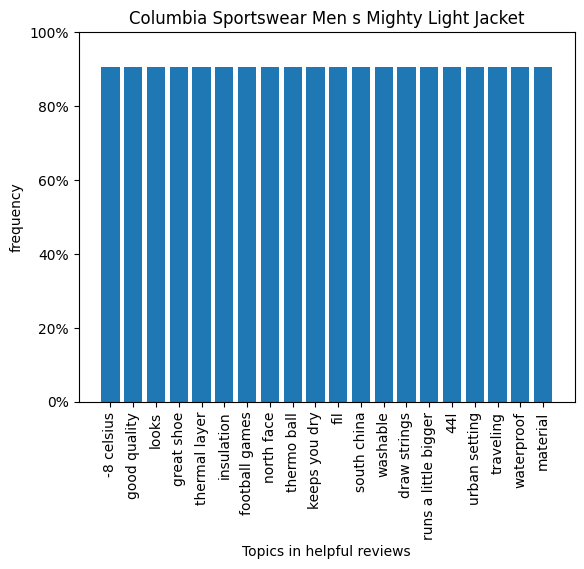

In [25]:
print(len(y_pos))
fig, ax = plt.subplots()
bars = ax.bar(x_pos, y_pos)
scaled_y = [val / max(y_pos) * 100 for val in y_pos]
# plt.bar(x, scaled_y)
ax.set_ylim(0, 100)
# ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation='vertical')
plt.xlabel('Topics in helpful reviews')
plt.ylabel('frequency')
# plt.yticks(y, ['{}%'.format(i) for i in y])
# plt.grid()
plt.title(title)
plt.show()


16


C:\Users\hamma\AppData\Local\Temp\ipykernel_1920\2677328738.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


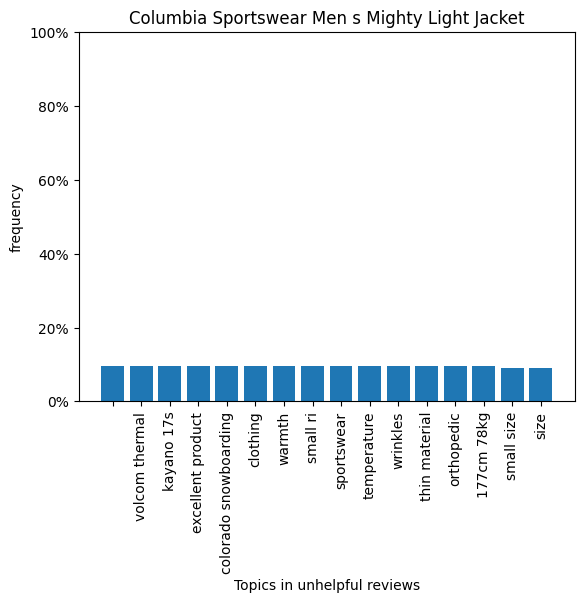

In [24]:
print(len(y_neg))
fig, ax = plt.subplots()
bars = ax.bar(x_neg, y_neg)
scaled_y = [val / max(y_neg) * 100 for val in y_neg]
# plt.bar(x, scaled_y)
ax.set_ylim(0, 100)
# ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation='vertical')

plt.xlabel('Topics in unhelpful reviews')
plt.ylabel('frequency')
# plt.yticks(y, ['{}%'.format(i) for i in y])
# plt.grid()
plt.title(title)
plt.show()


['helpful Reviews', 'unhelpful Reviews']


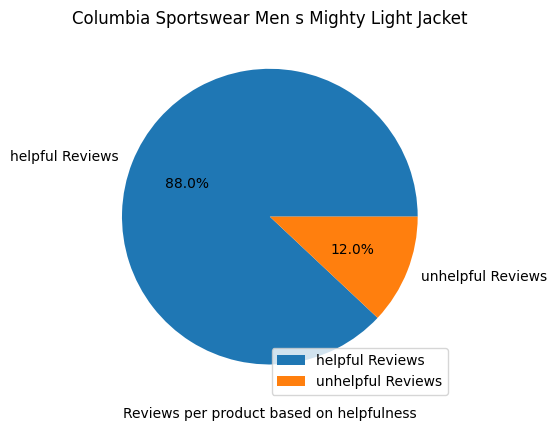

In [27]:
# indices = np.arange(len(x))

pie_array = [realReviews, fakeReviews]
pie_labels = ['helpful Reviews', 'unhelpful Reviews']
# Calculate total value
total = sum(pie_array)

# Concatenate total value with labels
labels_with_total = [f'{label}' for label, size in zip(pie_labels, pie_array)]
# labels_with_total.append(f'Total: {total}')
print(labels_with_total)
plt.pie(pie_array, labels=labels_with_total, autopct='%1.1f%%')

plt.xlabel('Reviews per product based on helpfulness')
plt.title(title)
plt.legend(loc='best', fontsize='medium')
# plt.legend()

plt.grid()
plt.show()